<a href="https://colab.research.google.com/github/MUbarak123-56/dlwpt-code/blob/master/chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/MUbarak123-56/dlwpt-code.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 703, done.
remote: Total 703 (delta 0), reused 0 (delta 0), pack-reused 703
Receiving objects: 100% (703/703), 176.00 MiB | 13.60 MiB/s, done.
Resolving deltas: 100% (309/309), done.
Updating files: 100% (228/228), done.


In [ ]:
import torch

In [ ]:
%cd dlwpt-code

/content/dlwpt-code


In [ ]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7'

In [ ]:
cifar10 = datasets.CIFAR10(data_path, train = True, download = True)
cifar10_val = datasets.CIFAR10(data_path,train = False, download = True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ../data-unversioned/p1ch7/cifar-10-python.tar.gz to ../data-unversioned/p1ch7
Files already downloaded and verified


In [ ]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

In [ ]:
from torchvision import transforms

In [ ]:
transformed_cifar10 = datasets.CIFAR10(data_path, train = True, download = False, 
                                       transform = transforms.Compose([transforms.ToTensor(), 
                                                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))]))
transformed_cifar10_val = datasets.CIFAR10(data_path, train = False, download = False, 
                                       transform = transforms.Compose([transforms.ToTensor(), 
                                                                       transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))]))

In [ ]:
label_map = {0:0, 2:1}
class_names = ["airplane", "bird"]

cifar2 = [(img, label_map[label]) for img, label in transformed_cifar10 if label in [0,2]]
cifar2_val = [(img, label_map[label]) for img, label in transformed_cifar10_val if label in [0,2]]

In [ ]:
import torch.nn as nn

In [ ]:
import torch.optim as optim

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size = 64, shuffle = True)

val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size = 64, shuffle = True)

In [ ]:
conv = nn.Conv2d(3, 16, kernel_size = 3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [ ]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [ ]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

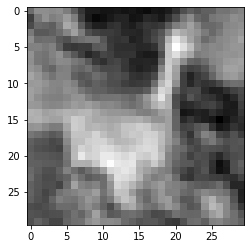

In [ ]:
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
conv = nn.Conv2d(3, 1, kernel_size = 3, padding = 1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [ ]:
with torch.no_grad():
  conv.bias.zero_()

with torch.no_grad():
  conv.weight.fill_(1.0/9.0)

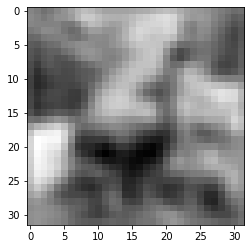

In [ ]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.show()

In [ ]:
conv = nn.Conv2d(3,1, kernel_size = 3, padding = 1)

with torch.no_grad():
  conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0], 
                                 [-1.0, 0.0, 1.0],
                                 [-1.0, 0.0, 1.0]])
  conv.bias.zero_()

In [ ]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))
 
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [ ]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
    self.act1 = nn.Tanh()
    self.pool1 = nn.MaxPool2d(2)
    self.conv2 = nn.Conv2d(16, 8, kernel_size = 3, padding = 1)
    self.act2 = nn.Tanh()
    self.pool2 = nn.MaxPool2d(2)
    self.fc1 = nn.Linear(8*8*8, 32)
    self.act3 = nn.Tanh()
    self.fc2 = nn.Linear(32,2)

  def forward(self, x):
    out = self.pool1(self.act1(self.conv1(x)))
    out = self.pool2(self.act2(self.conv2(out)))
    out = out.view(-1, 8*8*8)
    out = self.act3(self.fc1(out))
    out = self.fc2(out)
    return out

In [ ]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [ ]:
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
    self.conv2 = nn.Conv2d(16, 8, kernel_size = 3, padding = 1)
    self.fc1 = nn.Linear(8*8*8, 32)
    self.fc2 = nn.Linear(32, 2)
 
  def forward(self, x):
    out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
    out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
    out = out.view(-1, 8*8*8)
    out = torch.tanh(self.fc1(out))
    out = self.fc2(out)
    return out

In [ ]:
model = Net()
model(img.unsqueeze(0))

tensor([[ 0.1453, -0.0265]], grad_fn=<AddmmBackward0>)

In [ ]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
  for epoch in range(1, n_epochs + 1):
    loss_train = 0.0
    for imgs, labels in train_loader:
      outputs = model(imgs)
      loss = loss_fn(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_train += loss.item()

    if epoch == 1 or epoch % 10 == 0:
      print("{} Epoch {}, Training loss {}".format(datetime.datetime.now(), epoch, loss_train/len(train_loader)))

In [ ]:
model = Net()
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 100, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader)

2023-02-15 04:26:33.810552 Epoch 1, Training loss 0.5925562362762014
2023-02-15 04:27:02.401211 Epoch 10, Training loss 0.3261142108280947
2023-02-15 04:27:33.778643 Epoch 20, Training loss 0.2910328765583646
2023-02-15 04:28:02.008506 Epoch 30, Training loss 0.2684072442115492
2023-02-15 04:28:37.466269 Epoch 40, Training loss 0.24418062099795432
2023-02-15 04:29:09.381611 Epoch 50, Training loss 0.2286961640521979
2023-02-15 04:29:39.304307 Epoch 60, Training loss 0.20911910774032022
2023-02-15 04:30:12.836420 Epoch 70, Training loss 0.19388856980831
2023-02-15 04:30:39.744844 Epoch 80, Training loss 0.18248998093756902
2023-02-15 04:31:09.589597 Epoch 90, Training loss 0.16926217781510322
2023-02-15 04:31:45.616056 Epoch 100, Training loss 0.15666294456192642


In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=False)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

def validate(model, train_loader, val_loader):
  for name, loader in [("train",train_loader), ("val", val_loader)]:
    correct = 0
    total = 0

    with torch.no_grad():
      for imgs, labels in loader:
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

    print("Accuracy {}: {:.2f}".format(name, correct/total))

validate(model, train_loader, val_loader)

Accuracy train: 0.94
Accuracy val: 0.90


### Training on GPUs

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f"Training on a device {device}.")

Training on a device cuda.


In [ ]:

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
  for epoch in range(1, n_epochs + 1):
    loss_train = 0.0
    for imgs, labels in train_loader:
      imgs = imgs.to(device = device)
      labels = labels.to(device=device)
      outputs = model(imgs)
      loss = loss_fn(outputs, labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      loss_train += loss.item()

    if epoch == 1 or epoch % 10 == 0:
      print("{} Epoch {}, Training loss {}".format(datetime.datetime.now(), epoch, loss_train/len(train_loader)))

In [ ]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64,
                                           shuffle=True)

model = Net().to(device = device)
optimizer = optim.SGD(model.parameters(), lr = 1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs = 100, optimizer = optimizer, model = model, loss_fn = loss_fn, train_loader = train_loader)

2023-02-15 04:33:37.165712 Epoch 1, Training loss 0.559858756460202
2023-02-15 04:33:40.592766 Epoch 10, Training loss 0.32549128410922495
2023-02-15 04:33:44.242446 Epoch 20, Training loss 0.2846106785308024
2023-02-15 04:33:47.748242 Epoch 30, Training loss 0.2569551476912134
2023-02-15 04:33:51.236088 Epoch 40, Training loss 0.2365561093494391
2023-02-15 04:33:55.110696 Epoch 50, Training loss 0.2170946886585017
2023-02-15 04:33:58.600982 Epoch 60, Training loss 0.20039532506826577
2023-02-15 04:34:02.454638 Epoch 70, Training loss 0.18808936275494326
2023-02-15 04:34:06.660100 Epoch 80, Training loss 0.17357343162415892
2023-02-15 04:34:10.154713 Epoch 90, Training loss 0.16283055973850238
2023-02-15 04:34:13.618441 Epoch 100, Training loss 0.1503418341848501


In [ ]:
def validate(model, train_loader, val_loader):
  for name, loader in [("train",train_loader), ("val", val_loader)]:
    correct = 0
    total = 0

    with torch.no_grad():
      for imgs, labels in loader:
        imgs = imgs.to(device=device)
        labels = labels.to(device=device)
        outputs = model(imgs)
        _, predicted = torch.max(outputs, dim = 1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

    print("Accuracy {}: {:.2f}".format(name, correct/total))

validate(model, train_loader, val_loader)

Accuracy train: 0.94
Accuracy val: 0.89


In [ ]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplanes.pt')

In [ ]:
loaded_model = Net()                                 
loaded_model.load_state_dict(torch.load(data_path
                                        + 'birds_vs_airplanes.pt'))

<All keys matched successfully>